In [143]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

We have csv file of forest fire details. There are forest fires data from two regions in Algeria namely 1) Bejaia region from the north east and 2) Sidi-Bel Abbes region from the north west.There are 244 instances with 14 features in the dataset.

**Attribute Information:**

**Date : (DD/MM/YYYY)** Day, month ('june' to 'september'), year (2012)

Weather data observations

**Temp :** temperature noon (temperature max) in Celsius degrees: 22 to 42

**RH :** Relative Humidity in %: 21 to 90

**Ws:** 8Wind speed in km/h: 6 to 29

**Rain:** total day in mm: 0 to 16.8

**FWI Components**

**Fine Fuel Moisture Code (FFMC) index from the FWI system:** 28.6 to 92.5

**Duff Moisture Code (DMC) index from the FWI system:** 1.1 to 65.9

**Drought Code (DC) index from the FWI system:** 7 to 220.4

**Initial Spread Index (ISI) index from the FWI system:** 0 to 18.5

**Buildup Index (BUI) index from the FWI system:** 1.1 to 68

**Fire Weather Index (FWI) Index:** 0 to 31.1

**Classes:** two classes, namely fire and not fire


In [107]:
df1 = pd.read_csv('Bejaia Region ForestFire Dataset.csv')
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [108]:
df2 = pd.read_csv('Sidi-Bel Abbes Region ForestFire Dataset.csv')
df2.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [109]:
# Concatenating two dataframes
pd.concat([df1,df2]).to_csv('Fire.csv',index=False)

In [110]:
# Final dataset
data = pd.read_csv('Fire.csv')
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [114]:
data['Classes'].value_counts()

fire             132
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

Treatment of these duplicate values should be performed

In [116]:
# Treating the duplicates and foul data
data.Classes = data.Classes.str.strip()
data['Classes'].value_counts()

fire        138
not fire    106
Name: Classes, dtype: int64

In [117]:
# Datatypes and non-nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


In [118]:
# Checking for null values
data.isnull().sum()/len(df)*100

day            0.000000
month          0.000000
year           0.000000
Temperature    0.000000
RH             0.000000
Ws             0.000000
Rain           0.000000
FFMC           0.000000
DMC            0.000000
DC             0.000000
ISI            0.000000
BUI            0.000000
FWI            0.819672
Classes        0.000000
dtype: float64

In [119]:
data[data.isnull().any(axis=1)]
data= data.dropna().reset_index(drop=True)

In [120]:
data.isnull().sum()/len(df)*100

day            0.0
month          0.0
year           0.0
Temperature    0.0
RH             0.0
Ws             0.0
Rain           0.0
FFMC           0.0
DMC            0.0
DC             0.0
ISI            0.0
BUI            0.0
FWI            0.0
Classes        0.0
dtype: float64

There are no null values in the dataset

In [121]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [122]:
# Creating new column 'region' showing both north eastern and north-western region
data.loc[:122,'Region'] = 0
data.loc[122:,'Region'] = 1

In [123]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

There are few extra spaces in the columns names like 'Rain ', 'Classes '

In [124]:
# Removing extra spaces
data.columns = data.columns.str.strip()
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [125]:
data['Ws'] = data['Ws'].astype(float)

In [126]:
data['Region'] = data['Region'].astype(int)

In [127]:
data.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object

In [128]:
data.shape

(243, 15)

In [129]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [130]:
# Droppoing year as the data is for the same year=2012
data1 = data.drop(['year'],axis=1)
data1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [131]:
# Encoding target variable
data1['Classes'] = data1['Classes'].replace({'not fire' : 0, 'fire': 1})

In [137]:
data1.head(10)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
5,6,6,31,67,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,7,6,33,54,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,8,6,30,73,15.0,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
8,9,6,25,88,13.0,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,0
9,10,6,28,79,12.0,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,0


In [133]:
# Percentage classes
Class_percentage = data1.Classes.value_counts(normalize=True)*100
Class_percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

<AxesSubplot:>

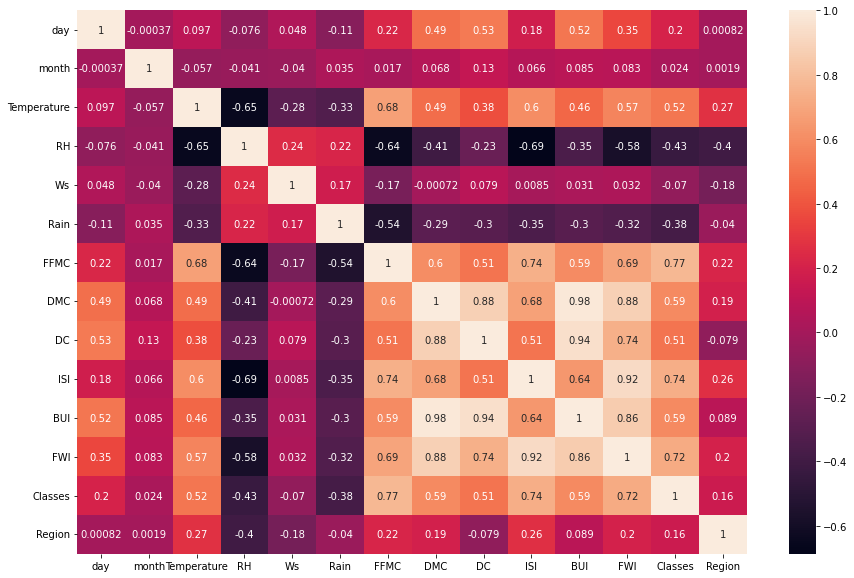

In [136]:
# Correlation
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(data1.corr(),annot=True)

In [138]:
X = data1.drop('Classes',axis=1)
Y = data1['Classes']

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=2022, stratify=Y)

In [141]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC

models = {
    "DT":DecisionTreeClassifier(random_state = 2022, max_depth=15),
    "Logistic": LogisticRegression(random_state = 2022),
    "SGD": SGDClassifier(random_state = 2022),
    "RF":RandomForestClassifier(random_state = 2022, max_depth=15),
    "Ada":AdaBoostClassifier(random_state=2022),
    "XGB":XGBClassifier(random_state=2022)
}
results = pd.DataFrame(columns=['Model', 'Train Score','Test Score','Recall','Precision','f1-score'])
def test_models(X_train, X_test, y_train, y_test):
    for model in models:
        fit = models[model].fit(X_train, y_train)
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.set_title(model)
        metrics.plot_confusion_matrix(fit, X_test, y_test, cmap='Blues', normalize='true', ax=ax)
        plt.show()
        train_score = round(fit.score(X_train, y_train),3)
        test_score = round(fit.score(X_test, y_test),3)
        recall = round(metrics.recall_score(y_test, fit.predict(X_test))*100,2)
        precision = round(metrics.precision_score(y_test, fit.predict(X_test))*100,2)
        f1 = round(metrics.f1_score(y_test, fit.predict(X_test))*100,2)
        results.loc[len(results.index)] = [model, train_score, test_score, recall, precision, f1]

C:\Users\shank\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


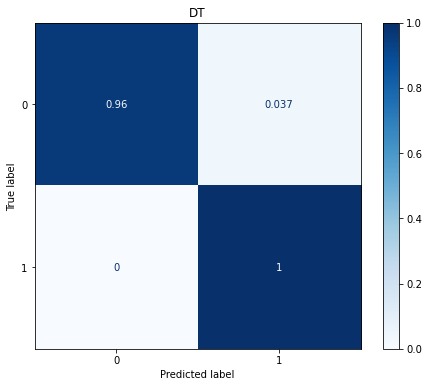

C:\Users\shank\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shank\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


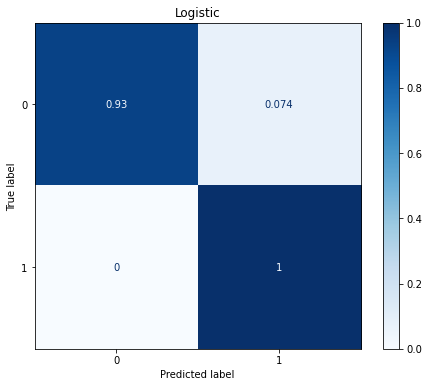

C:\Users\shank\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


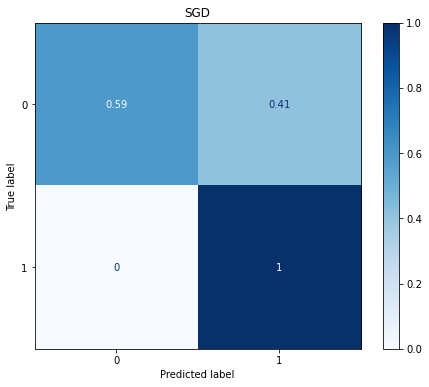

C:\Users\shank\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


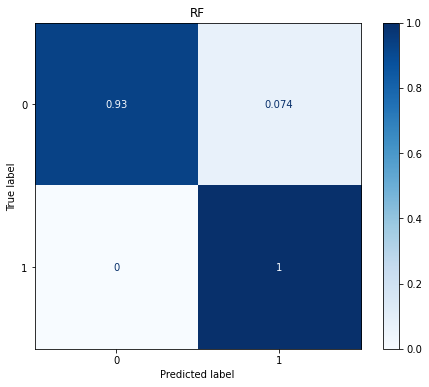

C:\Users\shank\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


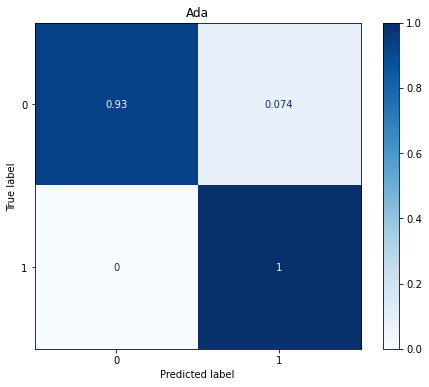

C:\Users\shank\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


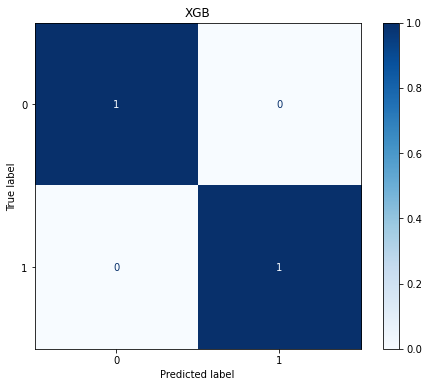

In [144]:
test_models(X_train, X_test, y_train, y_test)

In [145]:
results

,Model,Train Score,Test Score,Recall,Precision,f1-score
0,DT,1.000,0.984,100.0,97.14,98.55
1,Logistic,0.995,0.967,100.0,94.44,97.14
2,SGD,0.824,0.820,100.0,75.56,86.08
3,RF,1.000,0.967,100.0,94.44,97.14
4,Ada,1.000,0.967,100.0,94.44,97.14
5,XGB,1.000,1.000,100.0,100.00,100.00
